In [1]:
import pandas as pd

from math import ceil
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('lexpress.csv')
df.head()

,date,article
0,2022-04-27,"Emmanuel Macron, le président de la dernière c..."
1,2022-04-21,Eoliennes en vue Le vrai visage de Marine Le P...
2,2022-04-13,L'heure de la nouvelle gauche La candidate de ...
3,2022-07-04,Alerte aux hydrocarbures Soluble question cors...
4,2022-03-31,La microville et le méthaniseur Droite : les «...


In [3]:
df['article'] = df['article'].str.lower()

In [4]:
for punctuation in string.punctuation:
    df['article'] = df['article'].str.replace(punctuation, ' ')

/tmp/ipykernel_155114/785406140.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['article'] = df['article'].str.replace(punctuation, ' ')


In [5]:
stop_words = stopwords.words('french')
stop_words.extend(['plus', 'sais', 'chaque', 'celui', 'cette', 'ainsi', 'si', 'où', 'disait'])
df['article'] = df.apply(lambda row: [w for w in word_tokenize(row['article']) if not w in stop_words], axis=1)

In [6]:
lemmatizer = FrenchLefffLemmatizer()
df['article'] = df.apply(lambda row: [lemmatizer.lemmatize(word) for word in row['article']], axis=1)

In [7]:
df['article'] = [' '.join(map(str, row)) for row in df['article']]

In [8]:
vectorizer = TfidfVectorizer(ngram_range=(2,2))
X = vectorizer.fit_transform(df['article'])

count = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())

count.index = df['date']
count.head()

,000 10,000 60,000 abonné,000 an,000 cas,000 dispositif,000 dollar,000 dose,000 euro,000 evusheld,...,être épidermique,île continent,île crozon,île docteur,île fictive,île matthew,île politique,île rebelle,île salomon,îlot colorés
date,,,,,,,,,,,,,,,,,,,,,
2022-04-27,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-04-21,0.0,0.0,0.026887,0.0,0.0,0.0,0.0,0.026887,0.023973,0.026887,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-04-13,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-07-04,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-03-31,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.024850,0.000000,...,0.027871,0.027871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


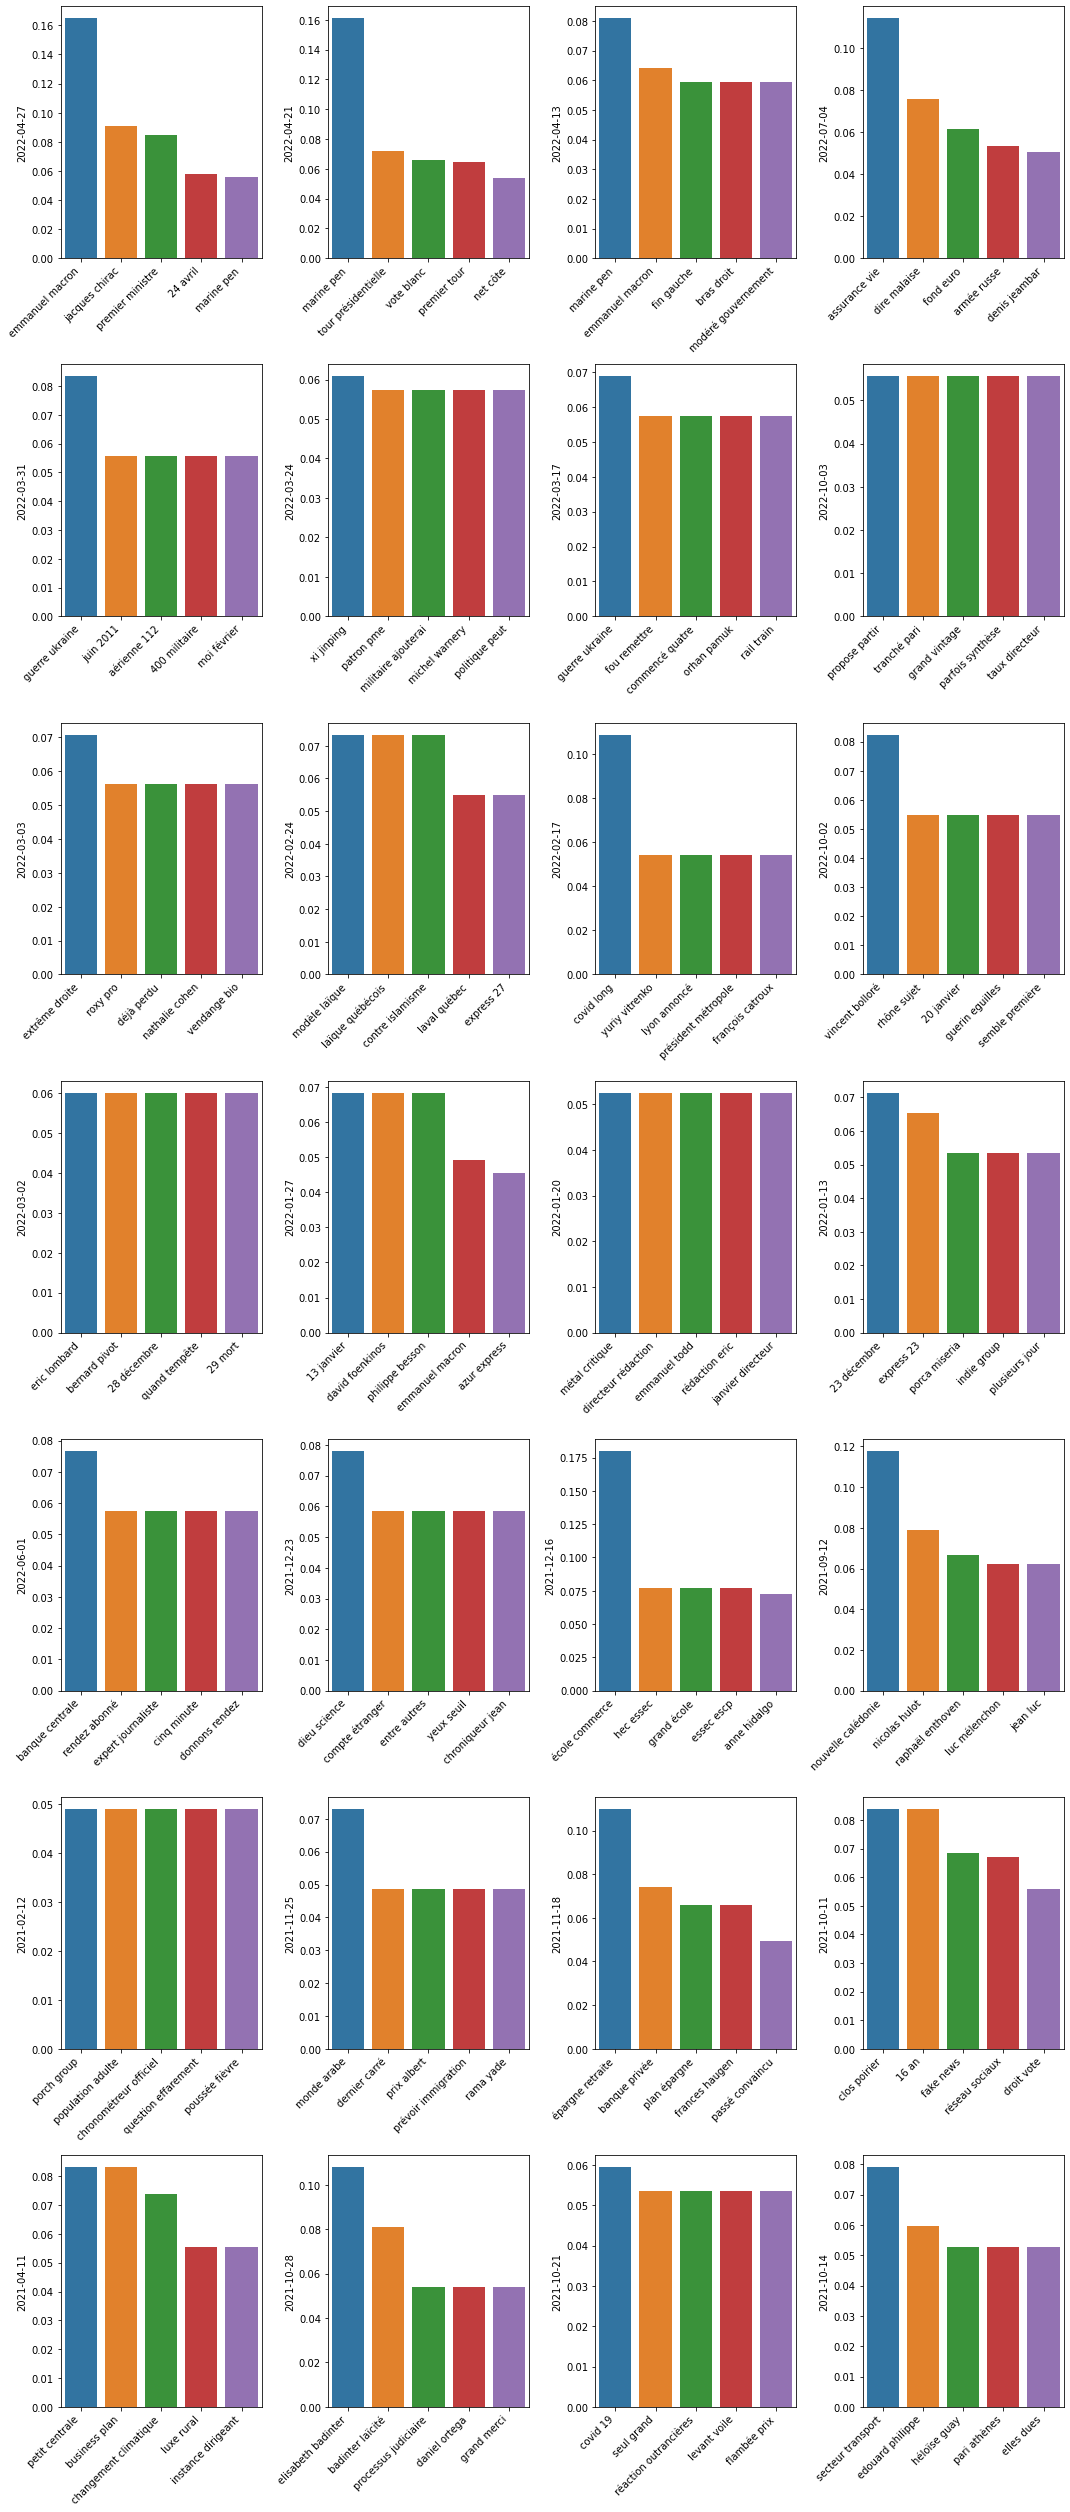

In [9]:
size = count.shape[0]

nr_rows = 7
nr_cols = 4

fig, ax = plt.subplots(nr_rows, nr_cols, figsize=(15, nr_rows*5))

i = 0
for r in range(nr_rows):
    for c in range(nr_cols):
        x = count.iloc[i].dropna().sort_values(ascending=False).head(5).index
        y = count.iloc[i].dropna().sort_values(ascending=False).head(5)
        sns.barplot(x=x, y=y, ax=ax[r][c])
        ax[r][c].set_xticklabels(x, rotation=45, ha='right')
        i+=1

plt.tight_layout()
plt.show()